In [1]:
# Import Required libraries. 
import pandas as pd 
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.ops import nearest_points
from shapely.geometry import Point, box



C:\Users\Admin\AppData\Local\Temp\ipykernel_13632\1627140724.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title = "Legend", fontsize="15") # Legend


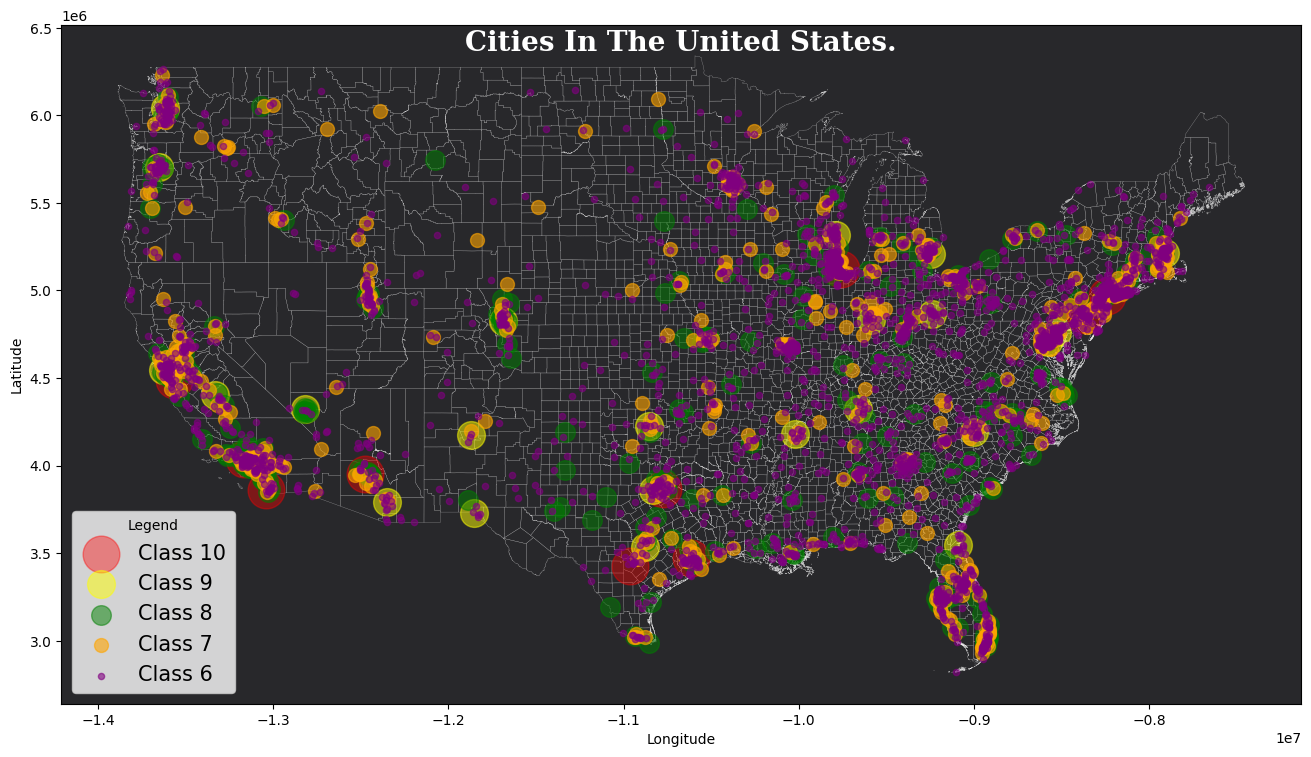

In [2]:
# Read and clean data.

path = 'F:/Programs/Secrets of ML/Data/US_Elections.gpkg'

# Read data containing county polygons. 
data = gpd.read_file(path, layer='US_CountyElections_clean')

# cities 
# Read cities data 

cities_10 = gpd.read_file(path, layer='US_Cities10')
cities_9 = gpd.read_file(path, layer='US_Cities9')
cities_8 = gpd.read_file(path, layer='US_Cities8')
cities_7 = gpd.read_file(path, layer='US_Cities7')
cities_6 = gpd.read_file(path, layer='US_Cities6')

# Plot data 
fig, ax = plt.subplots(figsize=(16, 12))
data.plot(ax=ax, color='#28282B', edgecolor='white', linewidth=0.2, alpha=0.6, label='County')
cities_10.plot(ax=ax, marker='o', color='red', markersize = 700, alpha=0.4, label='Class 10')
cities_9.plot(ax=ax, marker='o', color='yellow', markersize=400, alpha=0.5, label='Class 9')
cities_8.plot(ax=ax, marker='o', color='green', markersize=200, alpha=0.5, label='Class 8')
cities_7.plot(ax=ax, marker='o', color='orange', markersize=100, alpha=0.6, label='Class 7')
cities_6.plot(ax=ax, marker='o', color='purple', markersize=20, alpha=0.6, label='Class 6')

plt.legend(title = "Legend", fontsize="15") # Legend
plt.title("Cities In The United States.", fontsize=20, fontweight='bold', fontfamily='serif', y=0.95, color='white')  # Title 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().set_facecolor('#28282B')  # Background colour of plot area
plt.show()

In [5]:
# SWAP 
polygons = data.copy()
cities = cities_10.copy()

In [6]:
# Ensure the coordinate reference systems match
if polygons.crs != cities.crs:
    cities = cities.to_crs(polygons.crs)

print(polygons.crs)

EPSG:3857


In [7]:


# Calculate centroids of the polygons
polygons['centroid'] = polygons.geometry.centroid

# Function to find the nearest city and its distance to a given point
def nearest_city(point, cities):
    # Create a GeoDataFrame with the point
    point_gdf = gpd.GeoDataFrame([1], geometry=[point], crs=polygons.crs)
    
    # Calculate the distance to all cities
    cities['distance'] = cities.geometry.apply(lambda x: point.distance(x))
    
    # Find the nearest city and its distance
    nearest_city = cities.loc[cities['distance'].idxmin()]
    return nearest_city['distance'], nearest_city['geometry']

# Apply the function to all centroids
distances = polygons['centroid'].apply(lambda x: nearest_city(x, cities))

# Extract distances and nearest city geometries into separate columns
polygons['nearest_city_distance'] = distances.apply(lambda x: x[0])
polygons['nearest_city_geometry'] = distances.apply(lambda x: x[1])

# Save the results to a new GeoJSON file
# polygons.to_file('polygons_with_distances.geojson', driver='GeoJSON')

# Print the resulting DataFrame
print(polygons[['centroid', 'nearest_city_distance', 'nearest_city_geometry']])


                               centroid  nearest_city_distance  \
0      POINT (-9645026.082 3833753.405)           1.036218e+06   
1      POINT (-9765442.525 3598775.452)           8.601279e+05   
2      POINT (-9505914.945 3746243.296)           1.143575e+06   
3      POINT (-9698869.673 3895147.285)           1.010036e+06   
4      POINT (-9636626.283 4026263.840)           1.104867e+06   
...                                 ...                    ...   
3103  POINT (-12120348.469 5110570.057)           1.209380e+06   
3104  POINT (-12310826.184 5455875.155)           1.510266e+06   
3105  POINT (-12306098.516 5054935.962)           1.113309e+06   
3106  POINT (-11987255.211 5450872.689)           1.574009e+06   
3107  POINT (-11640436.826 5440938.737)           1.705044e+06   

                              nearest_city_geometry  
0         POINT (-10616262.3159 3472578.4114999995)  
1         POINT (-10616262.3159 3472578.4114999995)  
2         POINT (-10616262.3159 3472578.41149

In [8]:
polygons.head(2)

,county_FIPS,name,population,state_abbr,state_fips,state_name,voter_turnout_2008,voter_turnout_2012,voter_turnout_2016,voter_turnout_2020,...,2022_per_capitalincome,perc_2022_age_25+_no_diploma/highschool,perc_2022_age_25+_with_bachelors_degree,2022_avg_disposable_income,lifemode_5,region,geometry,centroid,nearest_city_distance,nearest_city_geometry
0,01001,Autauga County,58805,AL,01,Alabama,0.621968,0.590258,0.604600,0.632502,...,32233.0,7.53,17.39,66149.0,7.16,South,"MULTIPOLYGON (((-9619464.071 3856528.446, -961...",POINT (-9645026.082 3833753.405),1.036218e+06,POINT (-10616262.3159 3472578.4114999995)
1,01003,Baldwin County,231767,AL,01,Alabama,0.622114,0.592132,0.598103,0.627867,...,37891.0,5.77,22.58,70900.0,11.50,South,"MULTIPOLYGON (((-9742872.755 3543445.886, -974...",POINT (-9765442.525 3598775.452),8.601279e+05,POINT (-10616262.3159 3472578.4114999995)


In [39]:


data_copy = data.copy()


In [37]:
# Lets design a function that takes in a city layer, polygon and class then generates the distance between them.
# Counties that intersect with cities have distance 0

def closest_city(counties, cities, size):
    
    # ------- Centroid -----------
    # Find the centroid of each polygon, we will find the closest city to the center of polygon  
    counties['centroid_county'] = counties.centroid
    # Set center as link, join will use this column (instead of polygon) to find the closest city  
    counties = counties.set_geometry('centroid_county')


    #------- Nearest Join --------
    # Perform a nearest join , find the closest city to each polygon, include distance column 
    # Output is an union of both layers with and added distance column.
    # N\B - the geometry of the second layer, in this case points, is not included
    # When a layer intersects with a point distance will be 0
    cities_w_counties = gpd.sjoin_nearest(counties, cities, distance_col="distances", how='inner')

    # Divide distances by 1000 to get km units
    cities_w_counties.distances = cities_w_counties.distances / 1000

    # Filter columns, get geometry column of counties and the distance to nearest city
    # Also unique columns to identify both county(fips) and city(placefips) 
    #cities_w_counties = cities_w_counties[['county_FIPS', 'city_FIPS', 'distances', 'geometry']]



    # --------------      Merge operation     -------------------------------
    # Extract the geometry of the point layer with an left join with points layer
    merged = pd.merge(cities_w_counties, cities, how="left", on=["city_FIPS", "city_FIPS"])


    # Filter columns, remove all columns from point layer except geometry and distance of point
    # Geometry of polygon layer is removed to prevent complications during merging later 
    merged = merged[['county_FIPS', 'city_FIPS', 'geometry_y', 'distances']] 
    

    # Rename columns
    if size == 10 :
        merged.rename(columns={'distances':'distances_10', 
                               'geometry_y':'geometry_point',
                               'city_FIPS':'city10_FIPS'}, inplace=True)
    elif size == 9:
        merged.rename(columns={'distances':'distances_9',
                               'city_FIPS':'city9_FIPS'}, inplace=True)
    elif size == 8:
        merged.rename(columns={'distances':'distances_8',
                               'city_FIPS':'city8_FIPS'}, inplace=True)
    elif size == 7:
        merged.rename(columns={'distances':'distances_7',
                               'city_FIPS':'city7_FIPS'}, inplace=True)
    else :
        merged.rename(columns={'distances':'distances_6',
                               'city_FIPS':'city6_FIPS'}, inplace=True)
        
    


    # Return two tables, one with distance only and another with both geoms and distance 
    return merged


# Call function passing county layer, city points, and city class, then assign values to variables 
data_merged_10 = closest_city(data_copy, cities_10, 10)
data_merged_9 = closest_city(data_copy, cities_10, 9)
data_merged_8 = closest_city(data_copy, cities_10, 8)


In [40]:
print(f'Columns : {data_merged_10.columns} \n ----------- \n size : {data_merged_10.shape} \n\
      sample : {data_merged_10.head(2)}\n --------------------------------- \n\n')

data2 = data_copy.merge(data_merged_10, on='county_FIPS', how='inner')\
                .merge(data_merged_9, on='county_FIPS', how='inner')\
                .merge(data_merged_8, on='county_FIPS', how='inner')

print(f'Columns : {data2.columns} \n ----------- \n size : {data2.shape} \n---------------- \n \
      sample : {data2.head(2)}\n --------------------------------- \n\n')


Columns : Index(['county_FIPS', 'city10_FIPS', 'geometry_point', 'distances_10'], dtype='object') 
 ----------- 
 size : (3108, 4) 
      sample :   county_FIPS city10_FIPS                     geometry_point  distances_10
0       01001     4835000  POINT (-10616262.316 3472578.411)   1036.217737
1       01003     4835000  POINT (-10616262.316 3472578.411)    860.127903
 --------------------------------- 


Columns : Index(['county_FIPS', 'name', 'population', 'state_abbr', 'state_fips',
       'state_name', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'voter_turnout_2020', '2022_median_age',
       '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool',
       'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income',
       'lifemode_5', 'region', 'geometry', 'city10_FIPS', 'geometry_point',
       'distances_10', 'city9_FIPS', 'geometry_y_x', 'distances_9',
       'city8_FIPS', 'geometry_y_y', 'distances_8'],
      dtype='object'

In [6]:
cities_6_geom = cities_10['geometry']

cities_w_counties = gpd.sjoin_nearest(data, cities_6, distance_col="distances")
cities_w_counties

,county_FIPS,name,population,state_abbr,state_fips,state_name,voter_turnout_2008,voter_turnout_2012,voter_turnout_2016,voter_turnout_2020,...,geometry,centroid_geom,index_right,CLASS,STFIPS,city_FIPS,POP_CLASS,POPULATION,POP2010,distances
0,01001,Autauga County,58805,AL,01,Alabama,0.621968,0.590258,0.604600,0.632502,...,"MULTIPOLYGON (((-9619464.071 3856528.446, -961...",POINT (-9645026.082 3833753.405),614,city,01,0162328,6,34942,33960,0.000000
1,01003,Baldwin County,231767,AL,01,Alabama,0.622114,0.592132,0.598103,0.627867,...,"MULTIPOLYGON (((-9742872.755 3543445.886, -974...",POINT (-9765442.525 3598775.452),593,city,01,0132272,6,12586,9741,0.000000
1,01003,Baldwin County,231767,AL,01,Alabama,0.622114,0.592132,0.598103,0.627867,...,"MULTIPOLYGON (((-9742872.755 3543445.886, -974...",POINT (-9765442.525 3598775.452),589,city,01,0126992,6,17655,14618,0.000000
1,01003,Baldwin County,231767,AL,01,Alabama,0.622114,0.592132,0.598103,0.627867,...,"MULTIPOLYGON (((-9742872.755 3543445.886, -974...",POINT (-9765442.525 3598775.452),587,city,01,0125240,6,16937,15326,0.000000
1,01003,Baldwin County,231767,AL,01,Alabama,0.622114,0.592132,0.598103,0.627867,...,"MULTIPOLYGON (((-9742872.755 3543445.886, -974...",POINT (-9765442.525 3598775.452),583,city,01,0119648,6,25458,21570,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,56037,Sweetwater County,42272,WY,56,Wyoming,0.570610,0.548183,0.556711,0.555581,...,"MULTIPOLYGON (((-12229789.690 5201141.473, -12...",POINT (-12120348.469 5110570.057),2035,city,56,5667235,6,24051,23036,0.000000
3104,56039,Teton County,23331,WY,56,Wyoming,0.818477,0.711387,0.754752,0.855977,...,"MULTIPOLYGON (((-12319490.602 5569137.940, -12...",POINT (-12310826.184 5455875.155),13,city,16,1667420,6,28019,25484,83036.043901
3105,56041,Uinta County,20450,WY,56,Wyoming,0.598294,0.590730,0.603922,0.665892,...,"MULTIPOLYGON (((-12352602.028 5098190.980, -12...",POINT (-12306098.516 5054935.962),2030,city,56,5625620,6,12473,12359,0.000000
3106,56043,Washakie County,7685,WY,56,Wyoming,0.679934,0.654063,0.621679,0.672560,...,"MULTIPOLYGON (((-12083425.933 5491551.202, -12...",POINT (-11987255.211 5450872.689),2036,city,56,5669845,6,18441,17444,99267.553509


In [58]:
# print(cities_w_counties.to_string())
# The scope of these changes
# are local with systems to with statement.
# with pd.option_context('display.max_rows', None,):
#     print(cities_w_counties)



In [7]:
# data to be merged 
print(data.columns, '\n -------  : data shape ', data.shape)
print(data.shape)
print('\n\n')
print(merged_geom_10.columns, '\n -------  : merged data shape ', merged_geom_10.shape)

# Get the geometry of the second layer with an left join with points layer
print('\n\n ---------------- \n\n')
merged2 = pd.merge(data, merged_geom_10, how="inner", on=["county_FIPS", "county_FIPS"])
print(merged2.columns)
print(merged2.shape)
print(merged2.head(1))

Index(['county_FIPS', 'name', 'population', 'state_abbr', 'state_fips',
       'state_name', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'voter_turnout_2020', '2022_median_age',
       '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool',
       'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income',
       'lifemode_5', 'region', 'geometry', 'centroid_geom'],
      dtype='object') 
 -------  : data shape  (3108, 19)
(3108, 19)





NameError: name 'merged_geom_10' is not defined

In [51]:
# Get the geometry of the second layer with an left join with points layer
merged2 = pd.merge(data, merged_geom_10, how="inner", on=["county_FIPS", "county_FIPS"])
print(merged2.columns)
print(merged2.shape)
print(merged2.head(1))

Index(['county_FIPS', 'name', 'population', 'state_abbr', 'state_fips',
       'state_name', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'voter_turnout_2020', '2022_median_age',
       '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool',
       'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income',
       'lifemode_5', 'region', 'geometry', 'city10_FIPS', 'geometry_point_10',
       'distances_10'],
      dtype='object')
(3108, 21)
  county_FIPS            name  population state_abbr state_fips state_name  \
0       01001  Autauga County       58805         AL         01    Alabama   

   voter_turnout_2008  voter_turnout_2012  voter_turnout_2016  \
0            0.621968            0.590258              0.6046   

   voter_turnout_2020  ...  2022_per_capitalincome  \
0            0.632502  ...                 32233.0   

   perc_2022_age_25+_no_diploma/highschool  \
0                                     7.53   

   perc_202